# Liberias

In [1]:
import pandas as pd
from datetime import date
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

mpl.rcParams['figure.facecolor'] = "w"
warnings.filterwarnings('ignore')

# Carga de datos

Se estudía el comportamiento de la demanda con las distintas variables de influencia en los usuarios T1R-E4. Se corre el script del capitulo 3 para formar los clusters e identificar comportamientos similares. Se toman los perfiles promedios diarios sin distinción entre día laboral y no laboral. Se identifican los siguientes 4 clusters:

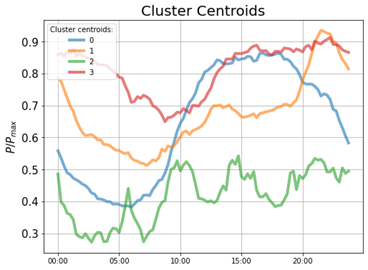 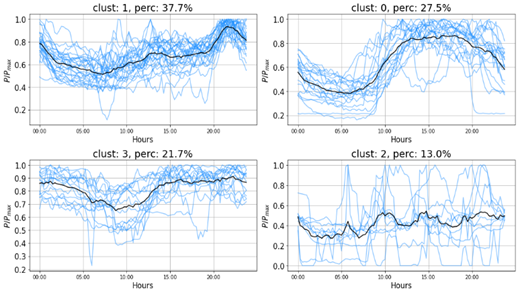



In [2]:
### Se importan los datos correspondientes a los usuarios que conforman el cluester 1 ###
Cluster_1 = ['19012132.csv',
             '19012066.csv',
             '19012806.csv',
             '19012671.csv',
             '19012015.csv',
             '19012717.csv',
             '17832734.csv',
             '19012613.csv',
             '19011933.csv',
             '19012099.csv',
             '19012038.csv',
             '19012609.csv',
             '19011884.csv',
             '19012858.csv',
             '19012736.csv',
             '19012911.csv',
             '18417696.csv',
             '19011846.csv',
             '18417662.csv',
             '19011943.csv',
             '18718780.csv',
             '19012795.csv',
             '19012738.csv',
             '19011932.csv',
             '19012663.csv',
             '19011957.csv',
             'verano_cluster_1.csv'
            ]

### Se importan los datos correspondientes a los usuarios que conforman el cluester 0 ###
Cluster_0 = ['19011864.csv',
             '19011952.csv',
             '19012145.csv',
             '19012823.csv',
             '19011903.csv',
             '19012010.csv',
             '19012588.csv',
             '19012772.csv',
             '19012107.csv',
             '19012804.csv',
             '19012674.csv',
             '18417692.csv',
             '19011959.csv',
             '19012994.csv',
             '19012698.csv',
             '19012911.csv',
             '19011982.csv',
             '18417661.csv',
             '19012807.csv',
             'verano_cluster_0.csv'
            ]
    
main_dataframe = pd.read_csv(Cluster_1[0]) # se elige el cluster que se quiere estudiar, en este caso, el análisis 
                                           # se realiza para el cluester 1 (en el tp se muestra el resultado para 
                                           # cluster 0 también)

for i in range(1, len(Cluster_1)):
    df = pd.read_csv(Cluster_1[i])
    main_dataframe = pd.concat([main_dataframe, df])

### cambio el nombre de las columnas ###

main_dataframe.columns = ['meter', 'timestamp', 'load']

### formateo la columna Data_Time ###

main_dataframe['timestamp'] = pd.to_datetime(main_dataframe.timestamp, format='%Y-%m-%d %H:%M:%S')

main_dataframe.head(5)

,meter,timestamp,load
0,19012132,2022-06-30 18:00:00,4.158
1,19012132,2022-06-30 17:45:00,3.461
2,19012132,2022-06-30 17:30:00,4.068
3,19012132,2022-06-30 17:15:00,3.052
4,19012132,2022-06-30 17:00:00,4.191


Se analiza la calidad de los datos

In [3]:
### elimino dupliclados ###

main_dataframe=main_dataframe.drop_duplicates()

### fecha de estudio ###

df = main_dataframe.query("timestamp > '2021-03-21' and timestamp <='2022-03-21'")

### porcentaje de datos traídos para la fecha de estudio x usuario ###

((df.groupby(['meter'])['timestamp'].count() / ((date(2022,3,1)-date(2021,3,1)).days*96+1))*100).round(2)

meter
17832734    99.72
18417662    99.66
18417696    99.52
18718780    99.77
19011846    99.73
19011884    99.15
19011932    99.50
19011933    90.59
19011943    99.70
19011957    99.44
19012015    99.14
19012038    99.23
19012066    98.94
19012099    99.46
19012132    99.42
19012609    99.40
19012613    99.22
19012663    99.40
19012671    98.81
19012717    99.24
19012736    99.34
19012738    99.17
19012795    99.39
19012806    98.71
19012858    99.45
19012911    99.00
Name: timestamp, dtype: float64

   ## CURVA DE CARGA AGREGADA 

Se forma la curva agregada de todos los usuarios que forman el cluster.

In [4]:
ts=df.groupby('timestamp', as_index=False)['load'].sum().set_index('timestamp')
ts.head(5)

,load
timestamp,
2021-03-21 00:15:00,18.872
2021-03-21 00:30:00,17.540
2021-03-21 00:45:00,18.202
2021-03-21 01:00:00,15.675
2021-03-21 01:15:00,15.754


 ## TEMPERATURAS

In [5]:
### se importa el archivo de temperaturas ###

temp = pd.read_excel('Temperatura SOTR.xls',sheet_name='Sheet1')

### cambio el nombre de las columnas ###

temp.columns = ['timestamp', 'Area','medicion','temp']

temp['timestamp'] = pd.to_datetime(temp.timestamp, format='%Y-%m-%d %H:%M:%S')

### fecha de estudio ###

temp = temp.query("medicion =='GRAL. RODRIGUEZ' and timestamp >= '2021-03-21' and timestamp <='2022-03-21'").drop(['Area','medicion'],axis=1).set_index('timestamp')

# colores
blue = sns.color_palette("muted", desat=0.9)[0]
green = sns.color_palette("muted", desat=0.9)[2]
red = sns.color_palette("muted", desat=0.9)[3]
grey = sns.color_palette("muted", desat=0.9)[7]


temp.head(5)

,temp
timestamp,
2021-03-21 01:00:00,15.578170
2021-03-21 02:00:00,14.955588
2021-03-21 03:00:00,14.833515
2021-03-21 04:00:00,14.711445
2021-03-21 05:00:00,15.041040



## FUNCIONES RESPALDO


In [6]:
def get_season(ts_in):
    season = pd.Series()

    for year in ts_in.index.year.unique():

        # se crean las estaciones del año
        yearly_season = pd.Series("inter-season", index=ts_in.loc[str(year)].index)

        yearly_season.loc[: "{}-3-21".format(year)] = "summer"
        yearly_season.loc["{}-12-21".format(year) :] = "summer"
        yearly_season.loc["{}-6-21".format(year) : "{}-9-21".format(year)] = "winter"

        season = pd.concat([season, yearly_season])
    return season


def plot_mean_daily_profiles(df_in, season_str):
    x_axis = pd.date_range("2017-1-1", periods=96, freq="15min").strftime("%H:%M")
    fontsize = 15
    
    df = df_in[season == season_str]
    df = df.assign(day_name=df.index.day_name(),
                         hour=df.index.strftime("%H:%M"))
       
    weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    (df.pivot_table("load", index="day_name", columns="hour")
     .T
     .loc[:, weekday_names]
     .plot(figsize=[8, 5],
           lw=3));

    plt.xticks(np.arange(0, len(x_axis), 8),x_axis[::8]);
    plt.xlabel("Hour", fontsize=fontsize)
    plt.ylabel("Load [kW]", fontsize=fontsize);
    plt.grid()
    plt.title("Mean Daily Profile - {}".format(season_str), fontsize=fontsize + 5);
    plt.ylim(10, 60)
    plt.show()
    
def plot_scatter(x, y, xlabel, ylabel, title, freq, s=30):
    df = pd.concat([x, y], axis=1)
    
    seasons = ["winter", "inter-season", "summer"]
    colors = {"winter": blue, "inter-season": grey, "summer": red}    

    fig = plt.figure(figsize=[17, 5])
    size = 15
    alpha=0.5

    for i, season_str in enumerate(seasons):

        fig.add_subplot(1, 3, i+1)
        df[season==season_str].resample(freq).mean().plot.scatter(ax=plt.gca(),
                        x=x.temp.name,
                        y=y.load.name,
                        s=s, 
                        alpha=alpha,
                        color=colors[season_str]
                       );
        plt.grid()
        plt.xlabel(xlabel, size=size)
        plt.ylabel(ylabel, size=size)
        plt.title("{} - {}".format(season_str.capitalize(), title), size=size);
        plt.xticks(size=size, rotation=45), plt.yticks(size=size);
    plt.tight_layout()
    
def plot_scatter2(x, y, xlabel, ylabel, title, freq, s=30):
    df = pd.concat([x, y], axis=1)
    
    seasons = ["winter", "inter-season", "summer"]
    colors = {"winter": blue, "inter-season": grey, "summer": red}    

    fig = plt.figure(figsize=[10, 5])
    size = 15
    alpha=0.5

    for i, season_str in enumerate(seasons):

        df[season==season_str].resample(freq).mean().plot.scatter(ax=plt.gca(),
                        x=x.temp.name,
                        y=y.load.name,
                        s=s, 
                        alpha=alpha,
                        color=colors[season_str]
                       );
        plt.grid()
        plt.xlabel(xlabel, size=size)
        plt.ylabel(ylabel, size=size)
        plt.title(" {}".format(title), size=size);
        plt.xticks(size=size, rotation=45), plt.yticks(size=size);
        plt.legend(["Winter", "Inter-season", "summer"])
    plt.tight_layout()

# 1. Perfil diario agregado x Temporada 

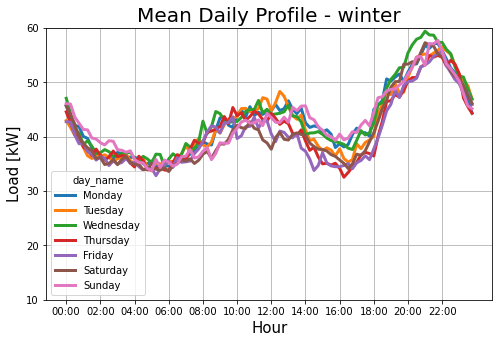

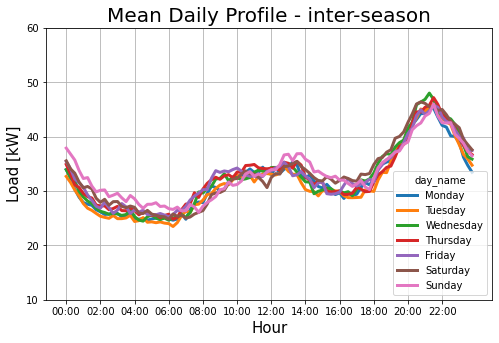

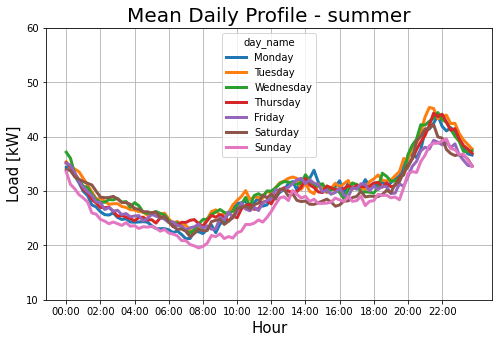

In [7]:
season = get_season(ts).rename("season")

#Cluster 1
plot_mean_daily_profiles(ts, season_str="winter")
plot_mean_daily_profiles(ts, season_str="inter-season")
plot_mean_daily_profiles(ts, season_str="summer")

# 2. Load vs Temperature

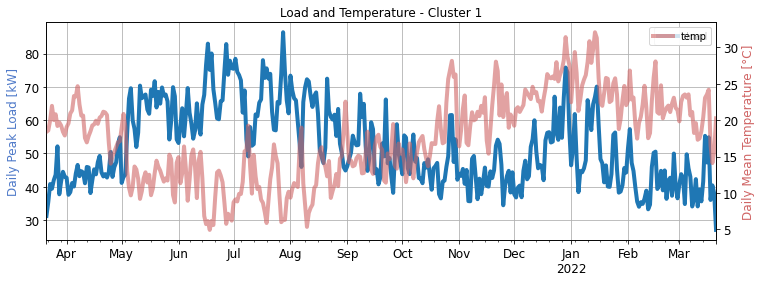

In [8]:
#Cluster 1
fig, ax1 = plt.subplots(figsize=[12, 4])

ts.resample("D").max().plot(ax=ax1, lw=4)
plt.xlabel("")
plt.ylabel("Daily Peak Load [kW]", fontsize=12, color=blue);
plt.xticks(fontsize=12), plt.yticks(fontsize=12);
plt.grid()
plt.title("Load and Temperature - Cluster 1")

ax2 = ax1.twinx()
temp.resample("D").mean().plot(ax=ax2, alpha=0.6, lw=4,
          color=red);
plt.yticks(fontsize=12);
plt.ylabel("Daily Mean Temperature [°C]", fontsize=12, color=red);

plt.show()

# 3. Correlación Demanda-Temperatura

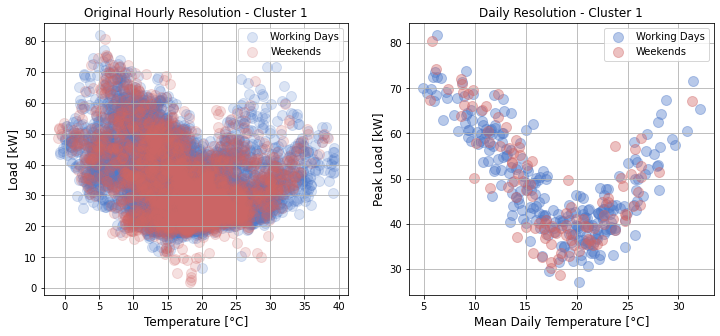

In [9]:
s = 100

#Cluster 1
ts_hourly=ts.resample("H").mean() #CONVIERTO LOS DATOS EN RESOLUCIÓN HORARIA PARA CORRELACIONAR CON LA TEMPERTATURA


fig = plt.figure(figsize=[12, 5])

fig.add_subplot(1, 2, 1)
plt.scatter(x=temp[ts_hourly.index.dayofweek < 5],
            y=ts_hourly[ts_hourly.index.dayofweek < 5], alpha=0.2, s=s, color=blue);

plt.scatter(x=temp[ts_hourly.index.dayofweek >= 5],
            y=ts_hourly[ts_hourly.index.dayofweek >= 5], alpha=0.2, s=s, color=red);
plt.grid()
plt.xlabel("Temperature [°C]", fontsize=12),
plt.ylabel("Load [kW]", fontsize=12);
plt.legend(["Working Days", "Weekends"])
plt.title("Original Hourly Resolution - Cluster 1");

fig.add_subplot(1, 2, 2)
plt.scatter(x=temp[ts_hourly.index.dayofweek < 5].resample("d").mean(),
            y=ts_hourly[ts_hourly.index.dayofweek < 5].resample("d").max(), alpha=0.4, s=s, color=blue);

plt.scatter(x=temp[ts_hourly.index.dayofweek >= 5].resample("d").mean(),
            y=ts_hourly[ts_hourly.index.dayofweek >= 5].resample("d").max(), alpha=0.4, s=s, color=red);
plt.grid()
plt.xlabel("Mean Daily Temperature [°C]", fontsize=12),
plt.ylabel("Peak Load [kW]", fontsize=12);
plt.legend(["Working Days", "Weekends"]);
plt.title("Daily Resolution - Cluster 1");
plt.show()


# 3.1 Correlación Demanda-Temperatura (todo en uno)

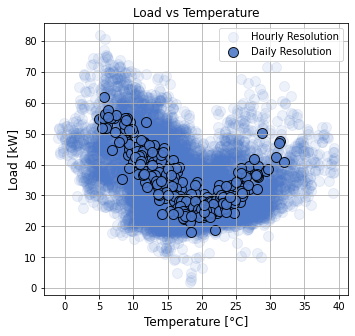

In [10]:
#Cluster 1
fig = plt.figure(figsize=[12, 5])

fig.add_subplot(1, 2, 1)
plt.scatter(x=temp,
            y=ts_hourly, alpha=0.1, s=s, color=blue);



plt.scatter(x=temp.resample("d").mean(),
            y=ts_hourly.resample("d").mean(), alpha=0.9, s=s, color=blue,edgecolor="black");

plt.grid()
plt.xlabel("Temperature [°C]", fontsize=12),
plt.ylabel("Load [kW]", fontsize=12);
plt.legend(["Hourly Resolution", "Daily Resolution"])
plt.title("Load vs Temperature");

# 3.2 Correlación Demanda-Temperatura  (x temporada y tipo de día)

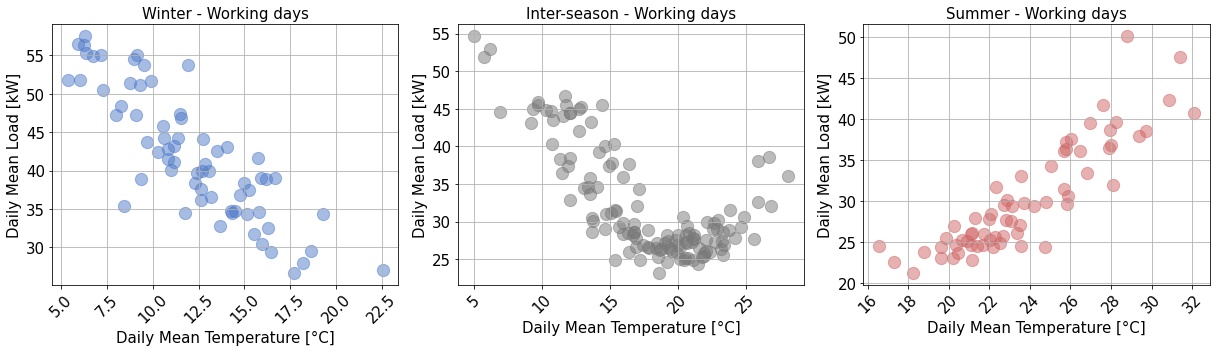

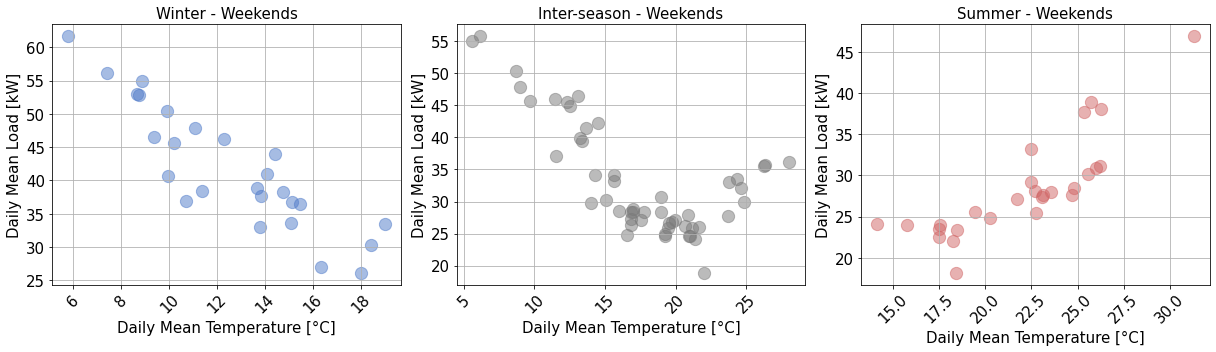

In [11]:
#Cluster 1
season = get_season(ts_hourly).rename("season")

plot_scatter(x=temp.loc[ts_hourly.index.dayofweek < 5], 
             y=ts_hourly.loc[ts_hourly.index.dayofweek < 5], 
             xlabel="Daily Mean Temperature [°C]", 
             ylabel="Daily Mean Load [kW]", 
             title="Working days",
             freq="24h",
             s=150
             )

plot_scatter(x=temp.loc[ts_hourly.index.dayofweek >= 5], 
             y=ts_hourly.loc[ts_hourly.index.dayofweek >= 5], 
             xlabel="Daily Mean Temperature [°C]", 
             ylabel="Daily Mean Load [kW]", 
             title="Weekends",
             freq="24h",
             s=150
             )

# 3.3 Correlación Demanda-Temperatura (x temporada todo en uno)


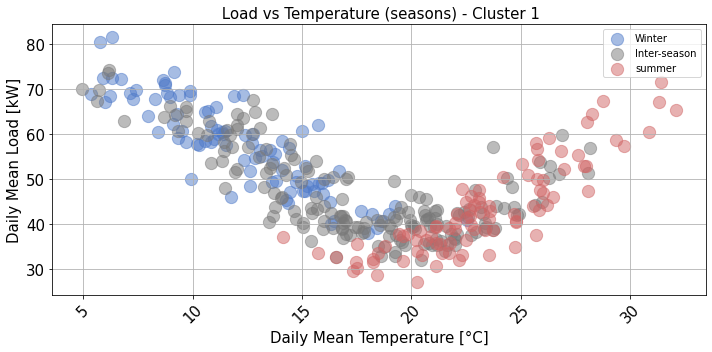

In [12]:
#Cluster 1
season = get_season(ts_hourly).rename("season")

plot_scatter2(x=temp, 
             y=ts_hourly.resample("d").max(), 
             xlabel="Daily Mean Temperature [°C]", 
             ylabel="Daily Mean Load [kW]", 
             title="Load vs Temperature (seasons) - Cluster 1",
             freq="24h",
             s=150
             )